## Editor: Keerti Banweer 
Presented by: Keerti Banweer (keerti.banweer@ou.edu)

Unsupervised learning

Clustering is a technique of identifying similar instances and assigning them to clusters 

Talk aboout kmeans, logistic regression, grid search CV 

relation between different features, feature selection

Kmeans
Steps followed in tutorial:
1. Using breast cancer dataset
2. Check for missing data, visualization, normalization and scaling using setup dataset 
3. Clustering the data using sklearn
4. visualizing the clusters with different graphs 
5. what are potential benefits, do supervised predictions on the clusters

## IMPORTS

In [2]:
###############################
# RUN THIS CELL BEFORE CODING #
###############################

# Index of sklearn datasets https://scikit-learn.org/stable/datasets/index.html #datasets
# https://scikit-learn.org/stable/modules/classes.html
# module-sklearn.datasets
from sklearn.datasets import load_breast_cancer, load_iris
from sklearn import cluster, datasets

import numpy as np
import itertools 
import time

from matplotlib import rcParams, pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics.cluster import contingency_matrix 
from sklearn.metrics.pairwise import paired_euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE

from sklearn.cluster import KMeans

%matplotlib inline
%reload_ext autoreload
%autoreload 2

rcParams['figure.figsize'] = (8, 8)

globalStart = time.time()


## SETUP DATA
Observe and understand structure of the data set feature_names is a field of the data object that lists all the names of the different attributes and metrics measured that can be used for analysis and classification; 
target_names are the names of the classes.

In [4]:
###############################
# RUN THIS CELL BEFORE CODING #
###############################

bc_dataset = datasets.load_breast_cancer()
X = bc_dataset.data
y = bc_dataset.target

feat_names = list(bc_dataset.feature_names)
targ_names = list(bc_dataset.target_names)

print ("SETUP BC_Dataset")
print (X.shape, y.shape)
print ("Features: \n" + str(feat_names))
print ("Targets: \n" + str(targ_names))
print (bc_dataset.DESCR)


# ## Cleaning and modifying data
# data = bc_dataset.drop('id',axis=1)
# data = bc_dataset.drop('Unnamed: 32',axis=1)

# # Mapping Benign to 0 and Malignant to 1 
# data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})

# # Scaling the dataset
# datas = pd.DataFrame(preprocessing.scale(data.iloc[:,1:32]))
# datas.columns = list(data.iloc[:,1:32].columns)
# datas['diagnosis'] = data['diagnosis']

# # Creating the high dimensional feature space X
# data_drop = datas.drop('diagnosis',axis=1)
# X = data_drop.values

# #Creating a 2D visualization to visualize the clusters
# from sklearn.manifold import TSNE
# tsne = TSNE(verbose=1, perplexity=40, n_iter= 4000)
# Y = tsne.fit_transform(X)

SETUP BC_Dataset
(569, 30) (569,)
Features: 
['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']
Targets: 
['malignant', 'benign']
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on

# Data clean up

Relation between different features, feature selection

In [13]:
nsamples = X.shape[0]
nfeatures = X.shape[1]

print(feat_names)
print(targ_names)

['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']
['malignant', 'benign']


#### IRIS DATA

In [5]:
###############################
# RUN THIS CELL BEFORE CODING #
###############################

iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target

iris_feat_names = list(iris.feature_names)
iris_targ_names = list(iris.target_names)

print ("SETUP IRIS")
print (X_iris.shape, y_iris.shape)
print ("Features: \n" + str(iris_feat_names))
print ("Targets: \n" + str(iris_targ_names))
print (iris.DESCR)


SETUP IRIS
(150, 4) (150,)
Features: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Targets: 
['setosa', 'versicolor', 'virginica']
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal

#### CLUSTERING IRIS DATASET

In [6]:
# RETREIVING CLUSTER EXAMPLE INDICIES
def get_examples_in_cluster_c(estimator, X, c):
    nclusters = estimator.cluster_centers_.shape[0]
    inds = np.where(estimator.labels_ == c)[0]
    return inds


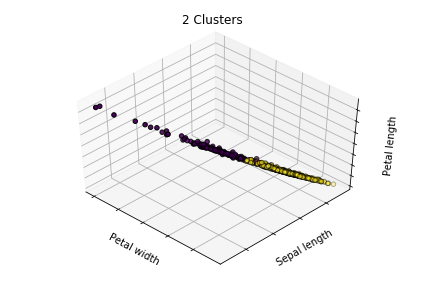

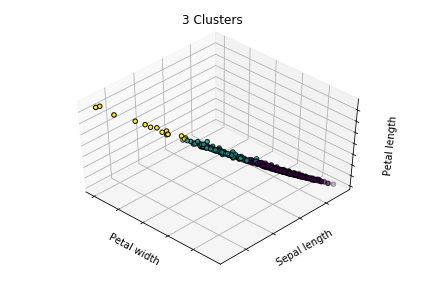

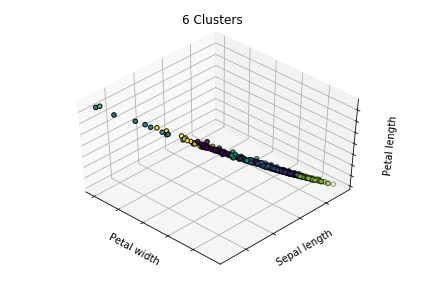

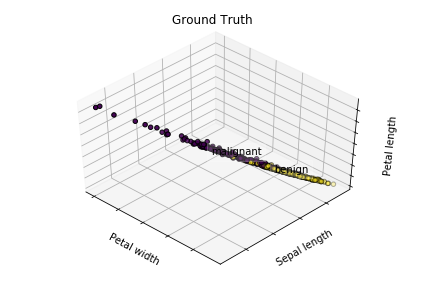

In [8]:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# Observing different Cluster counts
'''
TUTORIAL NOTES: Just have them play with different cluster sizes in the constructors
'''
estimators = [('2_clusters1', KMeans(n_clusters=2)),
              ('3_clusters2', KMeans(n_clusters=3)),
              ('6_clusters', KMeans(n_clusters=8))]
titles = ['2 Clusters','3 Clusters','6 Clusters']

plt.figure(1)
for i, (name, est) in enumerate(estimators):
    (fig, sub) = plt.subplots(2,2,num=i+1)
    xx = int(i > 1)
    yy = i % 2
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[i])
    ax.dist = 12
    plt.show()

# Plot the ground truth
fig = plt.figure(4)
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
for label, name in enumerate(targ_names):
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

plt.show()

#### BREAST CANCER DATA

In [8]:
###############################
# RUN THIS CELL BEFORE CODING #
###############################

bc = load_breast_cancer()

# Setup variables
X_bc = bc.data
y_bc = bc.target

bc_feat_names = list(bc.feature_names)
bc_targ_names = list(bc.target_names) # output: [0:'malignant', 1:'benign']

print ("SETUP")
print (X_bc.shape, y_bc.shape)
print ("Features: \n" + str(bc_feat_names))
print ("Targets: \n" + str(bc_targ_names))
print (bc.DESCR)


SETUP
(569, 30) (569,)
Features: 
['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']
Targets: 
['malignant', 'benign']
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perime

#### CLUSTERING BREAST CANCER DATASET

In [6]:
# analysing, visualizing dataset

###############################
# RUN THIS CELL BEFORE CODING #
###############################

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    #plt.savefig('confusion_mtx', bbox_inches="tight")
    

Confusion matrix, without normalization
[[122  90]
 [  2 355]]
Cosine similarity between between the clusters:
 0.9911
Average Euclidean distance (c0):
 18.8373
Average Euclidean distance (c1):
 254.8278


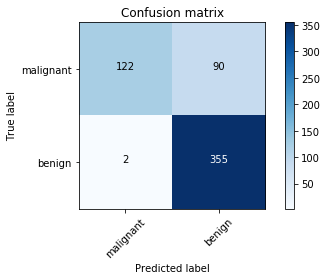

In [7]:
# Set up constants
n_clusters = len(bc_targ_names)
n_samples = y_bc.shape[0]
n_feats = X_bc.shape[1]
n_bins = int(np.sqrt(n_samples))

'''
TUTORIAL NOTES: Just have them alter the feature space and cluster sizes
Can breask the training data into train-test splits
'''
# Train model on all the examples, with a certain set of features. 
# Observe different cluster and feat_spaces. Using the entire fesature space results
# in worst performance
feat_space = range(0,5,1)
kmeans = KMeans(n_clusters=n_clusters)
preds = kmeans.fit_predict(X_bc[:,feat_space]) 

# get the examples from each cluster
c0 = kmeans.cluster_centers_[0,:]
c1 = kmeans.cluster_centers_[1,:]
c0Inds = get_examples_in_cluster_c(kmeans, X_bc, 0)
c1Inds = get_examples_in_cluster_c(kmeans, X_bc, 1)

# Basic Evaluation and Similarity Measures
cmtx = contingency_matrix(y_bc, preds)
cossim = np.mean(cosine_similarity(X_bc[c0Inds,:], X_bc[c1Inds,:]))
distc0 = np.zeros((c0Inds.shape[0],n_feats), float)
distc1 = np.zeros((c1Inds.shape[0],n_feats), float)
# cluster 0 : average distance of example points
for i in range(c0Inds.shape[0]):
    x = X_bc[i,feat_space]
    distc0[i,0] = paired_euclidean_distances(x.reshape(1, -1), c0.reshape(1, -1))
# cluster 1 : average distance of example points
for i in range(c1Inds.shape[0]):
    x = X_bc[i,feat_space]
    distc1[i,] = paired_euclidean_distances(x.reshape(1, -1), c1.reshape(1, -1))


plot_confusion_matrix(cmtx, bc_targ_names)
print ("Cosine similarity between between the clusters:\n %.04f" % cossim)
print ("Average Euclidean distance (c0):\n %.04f" % np.mean(distc0))
print ("Average Euclidean distance (c1):\n %.04f" % np.mean(distc1))


#### Visualizing the Clusters

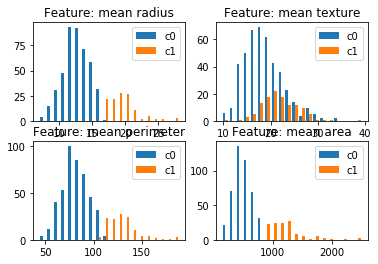

In [8]:
# Using the iris dataset, clusters visualization

# Observe the relative distributions for some of the features based on their respective cluster
# Observe any additional features
# Compute Kullbeck-Leibler distances
plt.figure(99)
for i, feat in enumerate(bc_feat_names[0:4]):
    plt.subplot(2,2,i+1)
    plt.hist([X_bc[c0Inds,i], X_bc[c1Inds,i]], bins=20, label=['c0','c1'])
    plt.title("Feature: %s" % bc_feat_names[i])
    plt.legend()
    

uniform grid, perplexity=5 in 32 sec
uniform grid, perplexity=30 in 26 sec
uniform grid, perplexity=50 in 23 sec
uniform grid, perplexity=100 in 38 sec


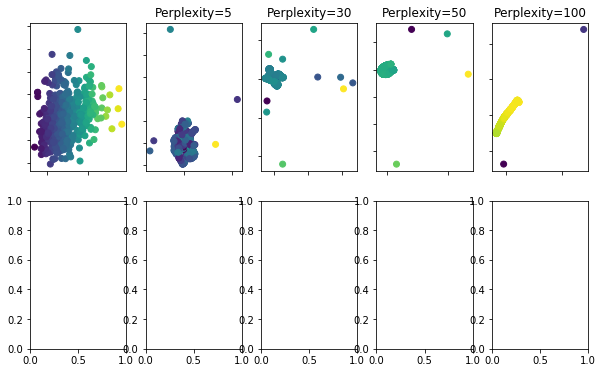

In [12]:
# t-SNE
# Probably won't cover this in the WS for the attendees. Something to play with more later.
(fig, subplot) = plt.subplots(2, 5, figsize=(10, 6))
perplexities = [5, 30, 50, 100]
x = np.linspace(0, 1, int(np.sqrt(n_samples)))
xx, yy = np.meshgrid(x, x)
X = np.hstack([
    xx.ravel().reshape(-1, 1),
    yy.ravel().reshape(-1, 1),
])
color = xx.ravel()
ax = subplot[0][0]
ax.scatter(X_bc[:, 0], X_bc[:, 1], c=X_bc[:,2])
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
for i, perplexity in enumerate(perplexities):
    ax = subplot[0][i + 1]

    t0 = time.time()
    tsne = TSNE(n_components=3, init='random', perplexity=perplexity)
    Y = tsne.fit_transform(X_bc[:,feat_space])
    t1 = time.time()
    print("uniform grid, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))

    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[:, 0], Y[:, 1], c=Y[:,2])
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')
